In [30]:
import sys
from os import environ
environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.10:0.4.1 pyspark-shell'
assert sys.version_info >= (3, 5)  # make sure we have Python 3.5+
from pyspark.sql import SparkSession, functions, types
spark = SparkSession.builder.appName('IoT').getOrCreate()
spark.sparkContext.setLogLevel('WARN')
assert spark.version >= '2.3'  # make sure we have Spark 2.3+
import os
import pandas as pd
import csv
import numpy as np
import random
import glob
import matplotlib
import matplotlib.pyplot as plt
import random
from sklearn.feature_selection import SelectKBest, chi2

get_ipython().magic('matplotlib inline')
df=pd.read_csv('/Users/liyifan/PycharmProjects/CMPT733/Project/rw_etl.csv/part-00000-14639349-6824-4673-b158-2b90e5e7a25c-c000.csv').sort_values(['TimeStamp'], ascending=True).reset_index()

df.drop(['::[scararobot]Ax_J1.PositionCommand','::[scararobot]Ax_J1.TorqueFeedback','::[scararobot]Ax_J2.PositionCommand','::[scararobot]Ax_J2.TorqueFeedback','::[scararobot]Ax_J3.TorqueFeedback','::[scararobot]Ax_J6.TorqueFeedback','::[scararobot]ScanTimeAverage','::[scararobot]Ax_J6.PositionCommand','::[scararobot]Ax_J3.PositionCommand','index'], axis=1, inplace=True)
df['TimeStamp']=pd.to_datetime(df['TimeStamp'])
# df.drop(['index'], axis=1, inplace=True)
pd.set_option('display.max_columns', None)  
df.head(5)
# df.iloc[:,1:21]=df.iloc[:,1:21].abs()
df['Total']= df.select_dtypes(include=['float64','float32']).apply(lambda row: np.sum(row),axis=1)

# x=df.iloc[:,1:20].values

# y=df.iloc[0:,20:21].values
# y=y.flatten()
# y = np.array(y).astype(int)
# print(y)
# print(type(x))
# print(type(y))
# SelBest = SelectKBest(chi2, k=15)
# features=SelBest.fit_transform(x,y)
# print(SelBest.get_support())
# print(features)
# # print(len(features))
# sumed=np.sum(features,axis=1)
# print(sumed)
# print(len(sumed))


In [2]:
from pandas.tseries import converter
converter.register()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


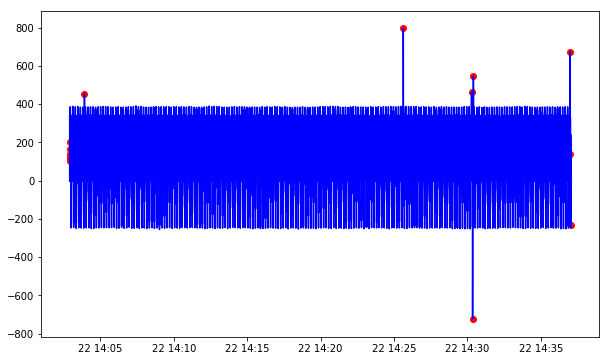

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
data=df.iloc[:,1:20]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# IsolationForest 
outliers_fraction=0.01
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
df['anomaly2'] = pd.Series(model.predict(data))

fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly2'] == -1, ['TimeStamp','Total']] #anomaly

ax.plot(df['TimeStamp'], df['Total'], color='blue')
# ax.plot(a['TimeStamp'],a['Total'], color='red')
ax.scatter(list(a.TimeStamp.values), list(a.Total.values), color='red')
plt.show();


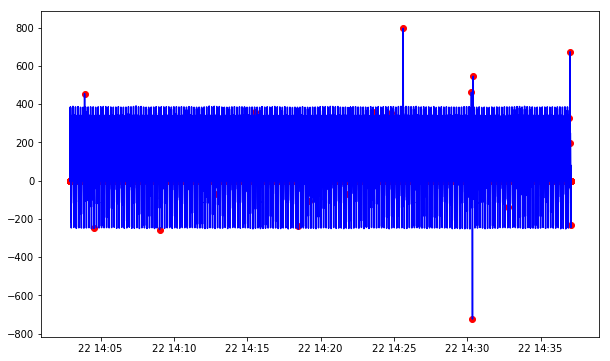

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
data=df.iloc[:,1:20]

scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# oneclassSVM 
outliers_fraction=0.0005
model = OneClassSVM(nu=outliers_fraction, kernel="rbf",gamma='scale')
model.fit(data)
df['anomaly3'] = pd.Series(model.predict(data))
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly3'] == -1, ['TimeStamp','Total']] #anomaly

ax.plot(df['TimeStamp'], df['Total'], color='blue')
# ax.plot(a['TimeStamp'],a['Total'], color='red')
ax.scatter(list(a.TimeStamp.values), list(a.Total.values), color='red')
# ax.scatter(a['TimeStamp'],a['Total'],color='red')
plt.show();


In [ ]:
### df['Total']= df.select_dtypes(include=['float64','float32']).apply(lambda row: np.sum(row),axis=1)
ts = pd.Series(df['Total'])
ts.plot(c='b', title='RW Total Sensor Aggregation')
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

num_periods = 100
f_horizon = 1       #number of periods into the future we are forecasting
# TS = np.array(ts)   #convert time series object to an array
TS=sumed
print(TS)
x_data = TS[:(len(TS)-(len(TS) % num_periods))]

x_batches = x_data.reshape(-1, num_periods, 1)
# print (x_batches.shape)
# y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
# y_batches = y_data.reshape(-1, num_periods, 1)
# print (y_batches.shape)
# print(x_batches[0:5])


In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(x)
print (pca.explained_variance_ratio_)

[6.39463867e-01 3.31421921e-01 1.40439612e-02 1.23532562e-02
 2.00633328e-03 4.44681272e-04 1.59438333e-04 6.26044157e-05
 3.01846766e-05 1.29586807e-05 6.87925112e-07 8.59150506e-08
 1.68232701e-08 2.02816859e-09 8.15876684e-10]


81962
[   0.       3725.04489     0.       3760.365783    0.       3791.575746
    0.       3822.06669     0.       3849.690051]
[   0.       3725.04489     0.       3760.365783    0.      ]
819
(819, 100, 1)
[3725.04489     0.       3760.365783 ...    0.       2537.542503
    0.      ]
81900
819
(1, 100, 1)
[[[0.]]]
(1, 100, 1)
[[[2476.45866]]]
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.
0 	MSE: 458817270000.0
100 	MSE: 9940302000.0
200 	MSE: 8608313000.0
300 	MSE: 8441198600.0
400 	MSE: 8424368000.0
500 	MSE: 8423999000.0
600 	MSE: 8401038000.0
700 	MSE: 8388377000.0
800 	MSE: 8379012000.0
900 	MSE: 8366542000.0
[[[2468.3787]]]


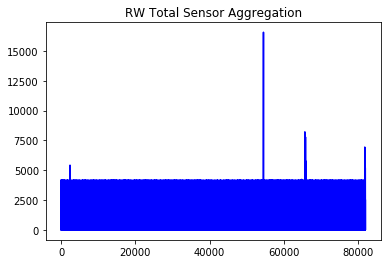

In [70]:
df['Total']= df.select_dtypes(include=['float64','float32']).apply(lambda row: np.sum(row),axis=1)
ts = pd.Series(df['Total'])
ts.plot(c='b', title='RW Total Sensor Aggregation')
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

num_periods = 100
f_horizon = 1       #number of periods into the future we are forecasting
# TS = np.array(ts)   #convert time series object to an array
print (len(TS))
print (TS[0:10])
x_data = TS[:(len(TS)-(len(TS) % num_periods))]
print (x_data[0:5])
x_batches = x_data.reshape(-1, num_periods, 1)
print (len(x_batches))
print (x_batches.shape)
y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
print (y_data)
print (len(y_data))
y_batches = y_data.reshape(-1, num_periods, 1)
print (len(y_batches))
def test_data(series,forecast,num_periods):
    test_x_setup = series[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, num_periods, 1)
    testY = TS[-(num_periods):].reshape(-1, num_periods, 1)
    return testX,testY

X_test, Y_test = test_data(TS,f_horizon,num_periods)
print (X_test.shape)
print (X_test[:,(num_periods-1):num_periods])
print (Y_test.shape)
print (Y_test[:,(num_periods-1):num_periods])

inputs = 1
hidden = 100
output = 1
X = tf.placeholder(tf.float32, [None, num_periods, inputs], name = "X")  
y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)
stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)   
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])
learning_rate = 0.001
loss = tf.reduce_sum(tf.square(outputs - y),name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()
epochs = 1000
saver = tf.train.Saver()  
DIR="/Users/liyifan/TFmodel"
with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, "\tMSE:", mse)

    y_pred = sess.run(outputs, feed_dict={X: X_test})
    print(y_pred[:,(num_periods-1):num_periods])
    saver.save(sess, os.path.join(DIR,"IoT_TF_model"),global_step = epochs)
